# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

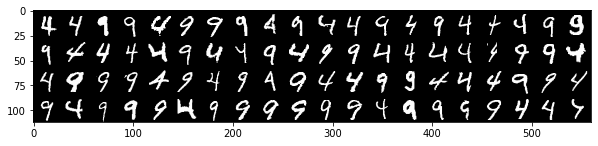

In [4]:
show_digit(X)

In [6]:
# Do feature normalization here
mean = np.mean(X, axis=1, keepdims=True)
std = np.std(X, axis=1, keepdims=True)
std[std==0] = 1e-9
X = (X - mean) / std 

# Do feature normalization to X_test, y_test
mean = np.mean(X_test, axis=1, keepdims=True)
std = np.std(X_test, axis=1, keepdims=True)
std[std==0] = 1e-9
X_test = (X_test - mean) / std 

### Ridge Regression and LOOCV

In [10]:
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_val = X[:, j]
        y_val = y[:, j]
        X_train = np.delete(X, j, axis=1)  # take point j out of X
        y_train = np.delete(y, j, axis=1) 
        
        w = ridge(X_train, y_train, lmbdas[i])
        E_val += 0.5 * (1 - np.sign(np.dot(w.T, np.append(1, X_val)) * y_val))

    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]    
    
    # end answer
print('lambda = %e' % lmbda)
print('E_val = %f' % E_val_min)

lambda = 1.000000e+02
E_val = 7.000000


In [11]:
print('without regularization')
w = ridge(X, y, 0) # train with all X
E_train = 0.5 * np.sum(1 - np.sign(np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X))) * y)) / X.shape[1]
E_test = 0.5 * np.sum(1 - np.sign(np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))) * y_test)) / X_test.shape[1]
    
print('\tsquare sum of weights:', np.sum(w**2))
print('\ttraining error:', E_train)
print('\ttesting error:', E_test)


print('with regularization')
w = ridge(X, y, lmbda)
E_train = 0.5 * np.sum(1 - np.sign(np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X))) * y)) / X.shape[1]
E_test = 0.5 * np.sum(1 - np.sign(np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))) * y_test)) / X_test.shape[1]

print('\tsquare sum of weights:', np.sum(w**2))
print('\ttraining error:', E_train)
print('\ttesting error:', E_test)


without regularization
	square sum of weights: 1.0204766956977491
	training error: 0.0
	testing error: 0.12606730286288298
with regularization
	square sum of weights: 0.13289524019362609
	training error: 0.0
	testing error: 0.05976896032144651


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [12]:
from logistic_r import logistic_r

y = (y + 1) / 2
y_test = (y_test + 1) / 2

In [34]:
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_val = X[:, j]
        y_val = y[:, j]
        X_train = np.delete(X, j, axis=1)  # take point j out of X
        y_train = np.delete(y, j, axis=1) 
        
        w = logistic_r(X_train, y_train, lmbdas[i])
        E_val += 0.5 * (1 - np.sign(np.dot(w.T, np.append(1, X_val)) * y_val))

    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]   
        
    # end answer
print('lambda = %e' % lmbda)
print('E_val = %f' % E_val_min)

/Users/albert/Projects/Assignments/ml_caideng/ml2019fall_hw2/regularization-cross-validation/logistic_r.py:28: RuntimeWarning: overflow encountered in exp
  y_pred = 1 / (1 + np.exp(-f))


lambda = 1.000000e-01
E_val = 62.500000


In [35]:
print('without regularization')
w = ridge(X, y, 0) # train with all X
E_train = 0.5 * np.sum(1 - np.sign(np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X))) * (y * 2 - 1))) / X.shape[1]
E_test = 0.5 * np.sum(1 - np.sign(np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))) * (y_test * 2 - 1))) / X_test.shape[1]
    
print('\tsquare sum of weights:', np.sum(w**2))
print('\ttraining error:', E_train)
print('\ttesting error:', E_test)


print('with regularization')
w = ridge(X, y, lmbda)
E_train = 0.5 * np.sum(1 - np.sign(np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X))) * (y * 2 - 1))) / X.shape[1]
E_test = 0.5 * np.sum(1 - np.sign(np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))) * (y_test * 2 - 1))) / X_test.shape[1]

print('\tsquare sum of weights:', np.sum(w**2))
print('\ttraining error:', E_train)
print('\ttesting error:', E_test)


without regularization
	square sum of weights: 0.510119173924438
	training error: 0.29
	testing error: 0.3018583626318433
with regularization
	square sum of weights: 0.5042202778830374
	training error: 0.175
	testing error: 0.30135610246107486
